
# Insight Project: Identify Gut Friendly Meds
### by Xiaodong Gu
### June 8, 2018

## part 1: peek the data


In [1]:
#peek of data
#in csv file, 4096 features have been computed for each chemical structure
%matplotlib inline
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [2]:
#generate features
data = pd.read_csv('data/human_targets_data.csv', sep=',')	
names = []
hits = []
fps = []

#convert smiles to rkd objects
for i in range(data.shape[0]):	
	try:
		arr = np.zeros((1, ))
		compound = Chem.MolFromSmiles(data.ix[i, 1])
		fp = AllChem.GetMorganFingerprintAsBitVect(compound, 3, 4096)
		DataStructs.ConvertToNumpyArray(fp, arr)
		fps.append(arr)
		names.append(data.iloc[i, 0])
		#label data by whether hits > 0
		hits.append(int(data.iloc[i, 2] > 0))
	except:
		print(i)
		print(data.ix[i, 0])
	
#create dataframe to store fingerprinters and write to csv file
df = pd.DataFrame(fps, index=names)
df.insert(0, "hits", hits)
df.to_csv('data/fingerprinters.csv')

/home/sheldon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


In [3]:
filename = 'data/fingerprinters.csv'
data = pd.read_csv(filename)
data.shape

(834, 4098)

In [4]:
data.head()

,Unnamed: 0,hits,0,1,2,3,4,5,6,7,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,Auranofin,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Diacerein,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Daunorubicin hydrochloride,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5-fluorouracil,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Benzbromarone,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


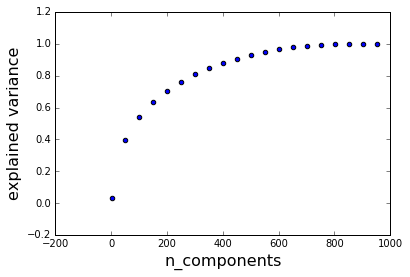

In [5]:
#calculate how much variance reserved after pca application
n = []
variance = []
for i in range(1, 1000, 50):
    pca = PCA(n_components=i)
    pca.fit(data.iloc[:, 2:].values)
    #print('total explained variance {}'.format(np.sum(pca.explained_variance_ratio_)))
    n.append(i)
    variance.append(np.sum(pca.explained_variance_ratio_))		
plt.xlabel('n_components', fontsize=16)
plt.ylabel('explained variance', fontsize=16)
plt.scatter(n, variance, c='b')

explained variance: 0.05838825861589714
(203, 2)
(631, 2)


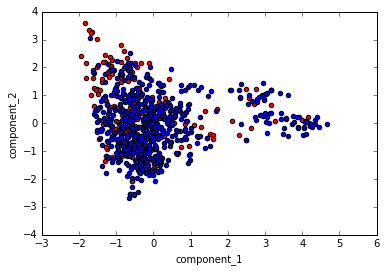

In [6]:
#visulize data after pca application
#n_components equal 2
pca = PCA(n_components=2)
pca.fit(data.iloc[:, 2:].values)
print('explained variance: {}'.format(np.sum(pca.explained_variance_ratio_)))
new_data_array = pca.transform(data.iloc[:, 2:].values)
pos_samples = new_data_array[data['hits'] > 0]
neg_samples = new_data_array[data['hits'] == 0]
print(pos_samples.shape)
print(neg_samples.shape)
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.scatter(pos_samples[:, 0], pos_samples[:, 1], c='r')
plt.scatter(neg_samples[:, 0], neg_samples[:, 1], c='b')

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 834 samples in 0.009s...
[t-SNE] Computed neighbors for 834 samples in 0.394s...
[t-SNE] Computed conditional probabilities for sample 834 / 834
[t-SNE] Mean sigma: 1.646675
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.050873
[t-SNE] Error after 300 iterations: 1.649574


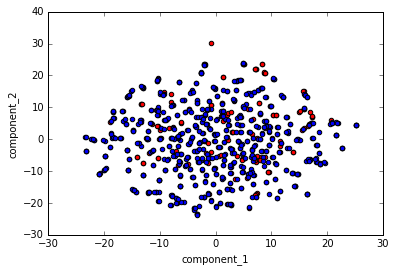

In [7]:
#visulize data after tsne application
#first do dimension reduction by pca
pca = PCA(n_components=200)
pca_data_array = pca.fit_transform(data.iloc[:, 2:])
tsne = TSNE(n_components=2, perplexity=5, verbose=1, n_iter=300)
new_data_array = tsne.fit_transform(pca_data_array)
pos_samples = new_data_array[data['hits'] > 0]
neg_samples = new_data_array[data['hits'] == 0]	
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.scatter(pos_samples[:, 0], pos_samples[:, 1], c='r')
plt.scatter(neg_samples[:, 0], neg_samples[:, 1], c='b')

(203, 2)
(631, 2)


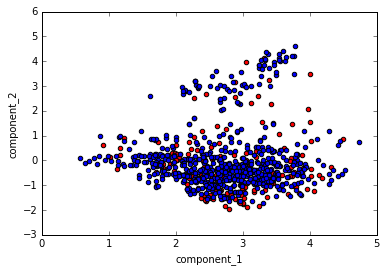

In [8]:
#visulize data after svd application
#n_components equal 2
svd = TruncatedSVD(n_components=2)
svd.fit(data.iloc[:, 2:].values)

new_data_array = svd.transform(data.iloc[:, 2:].values)
pos_samples = new_data_array[data['hits'] > 0]
neg_samples = new_data_array[data['hits'] == 0]
print(pos_samples.shape)
print(neg_samples.shape)
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.scatter(pos_samples[:, 0], pos_samples[:, 1], c='r')
plt.scatter(neg_samples[:, 0], neg_samples[:, 1], c='b')

In [10]:
new_data_array[:5, :]

array([[ 1.74163069,  0.76486697],
       [ 3.0479615 ,  0.00486773],
       [ 3.74261571,  1.47593254],
       [ 1.16930936,  0.22088887],
       [ 3.12063967, -0.50446683]])

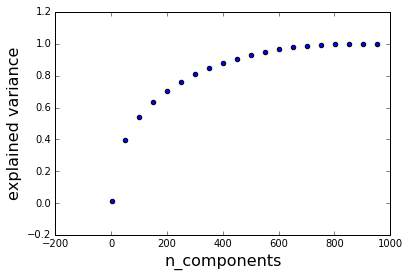

In [12]:
n = []
variance = []
for i in range(1, 1000, 50):
    svd = TruncatedSVD(n_components=i)
    svd.fit(data.iloc[:, 2:].values)
    #print('total explained variance {}'.format(np.sum(pca.explained_variance_ratio_)))
    n.append(i)
    variance.append(np.sum(svd.explained_variance_ratio_))		
plt.xlabel('n_components', fontsize=16)
plt.ylabel('explained variance', fontsize=16)
plt.scatter(n, variance, c='b')